<a href="https://colab.research.google.com/github/Prasadkpd/Machine-Learning/blob/master/12.Hyperparameter%20Optimization/Hyperparameter_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Optimization

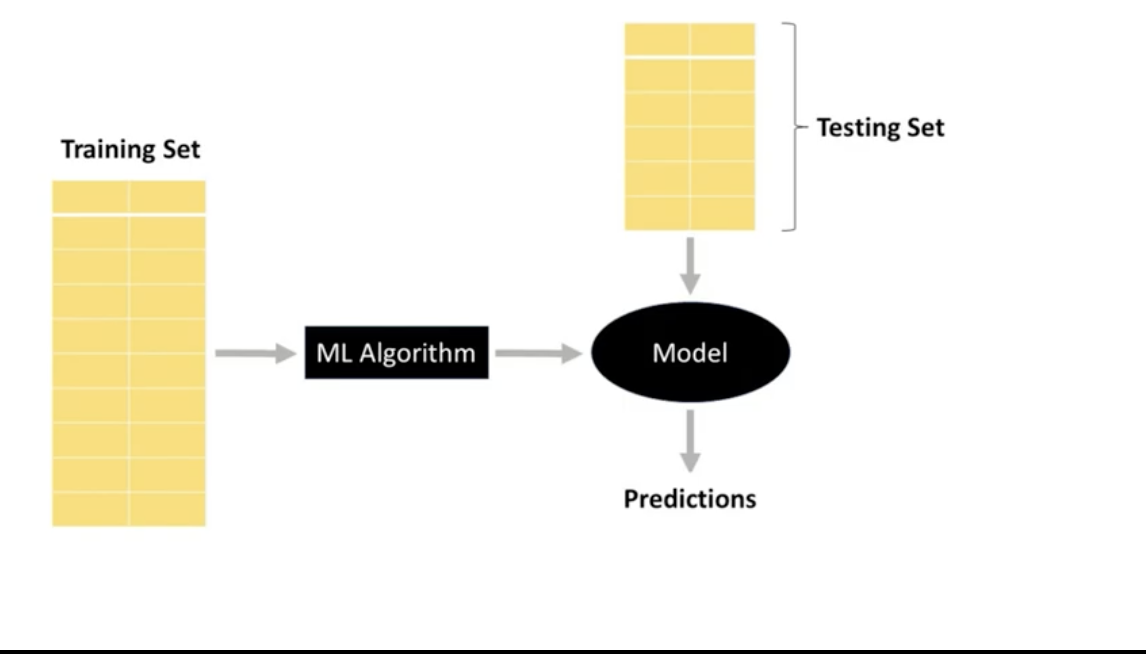

### Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning.

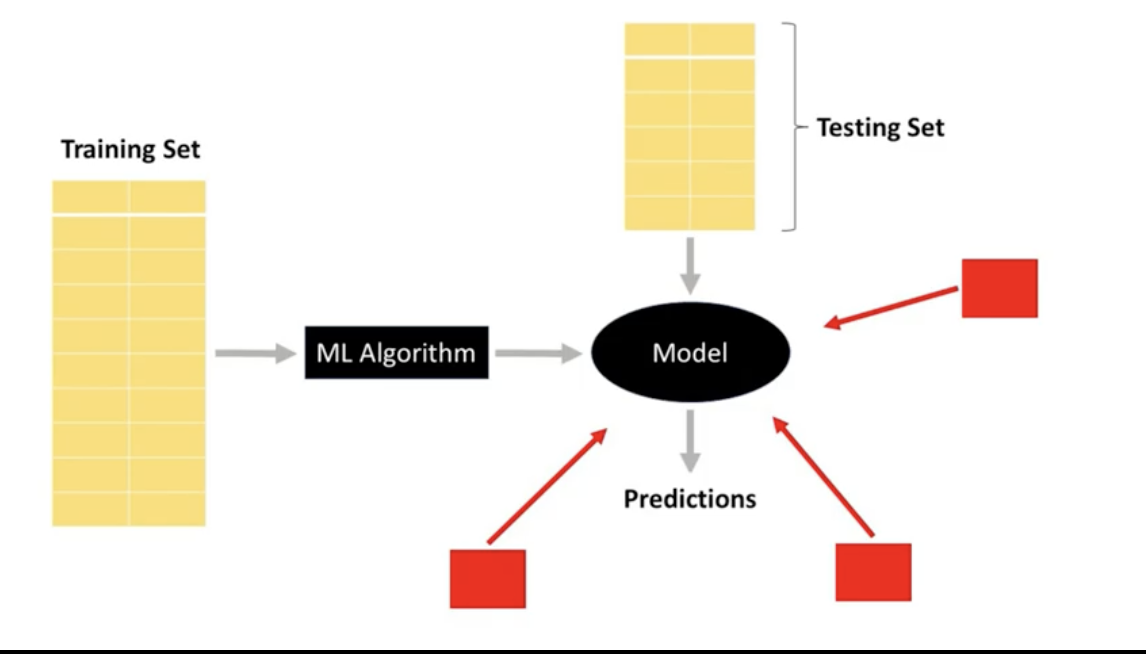

### Now we look how tuning hyperparameters

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("Iris.csv")
x= data.drop(["Species","Id"], axis=1)
y = data["Species"]

In [4]:
x.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
113,5.7,2.5,5.0,2.0
53,5.5,2.3,4.0,1.3
20,5.4,3.4,1.7,0.2
114,5.8,2.8,5.1,2.4
15,5.7,4.4,1.5,0.4


In [5]:
y.sample(5)

103     Iris-virginica
59     Iris-versicolor
130     Iris-virginica
107     Iris-virginica
112     Iris-virginica
Name: Species, dtype: object

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [19]:
from sklearn.svm import SVC
model = SVC()

In [20]:
model.fit(x_train, y_train)

SVC()

In [21]:
model.score(x_test, y_test)

0.9555555555555556

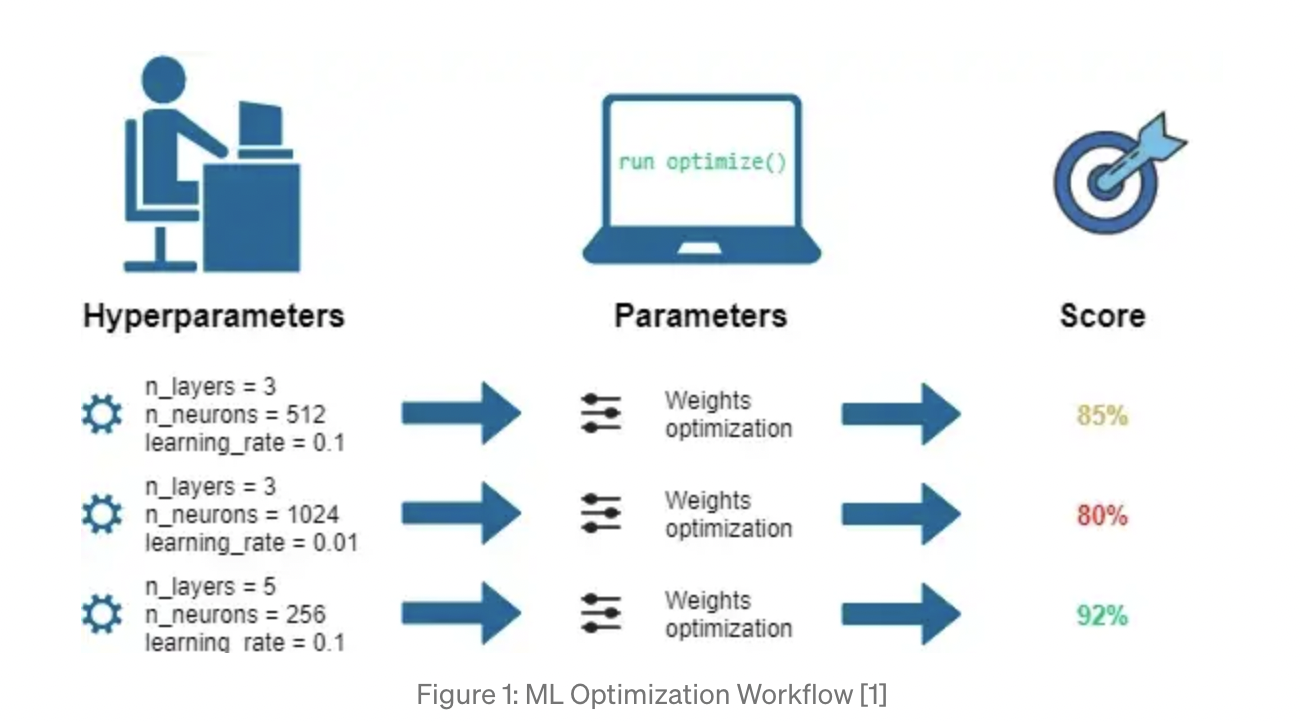

## For hyperparameter Tuning we use two methods

1. GridSearchCV
2. RandomizedSearchCV

In this we try to get the suitable parameter with the best accuracy score

## GridSearchCV

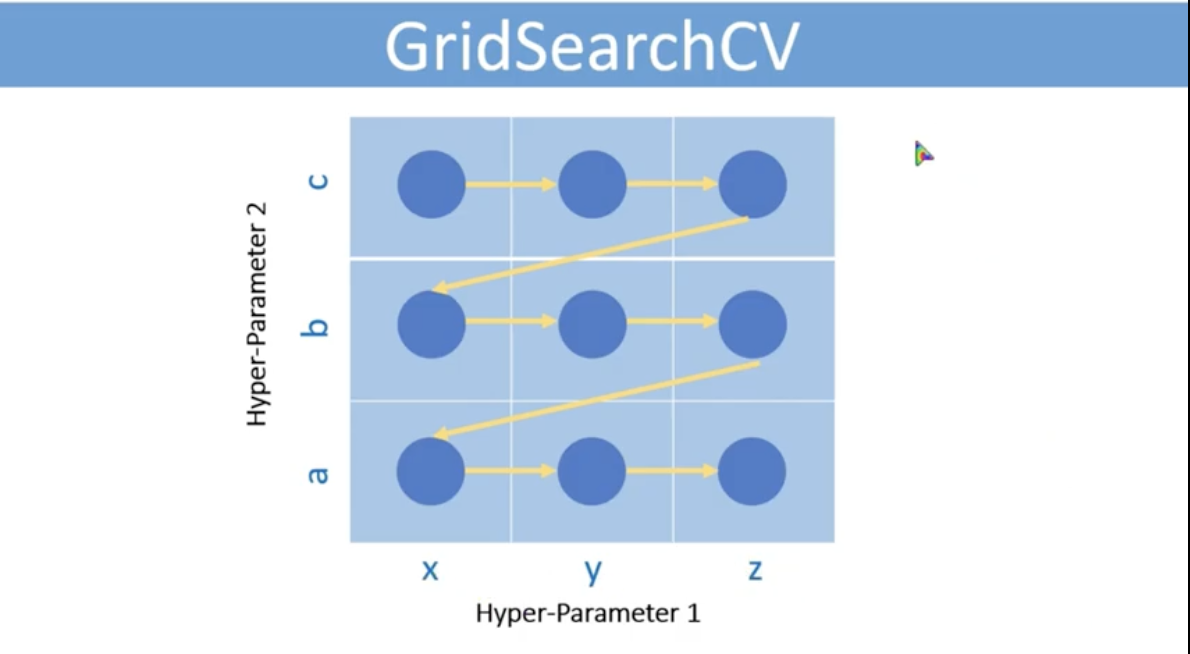

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {'C':[0.1,1,10], 'kernel':['rbf','linear','poly']}

In [24]:
grid_search = GridSearchCV(estimator= model, param_grid=param_grid)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['rbf', 'linear', 'poly']})

In [25]:
grid_search.best_params_

{'C': 10, 'kernel': 'linear'}

In [26]:
grid_search.score(x_test,y_test)

0.9555555555555556

## RandomizedSearchCV

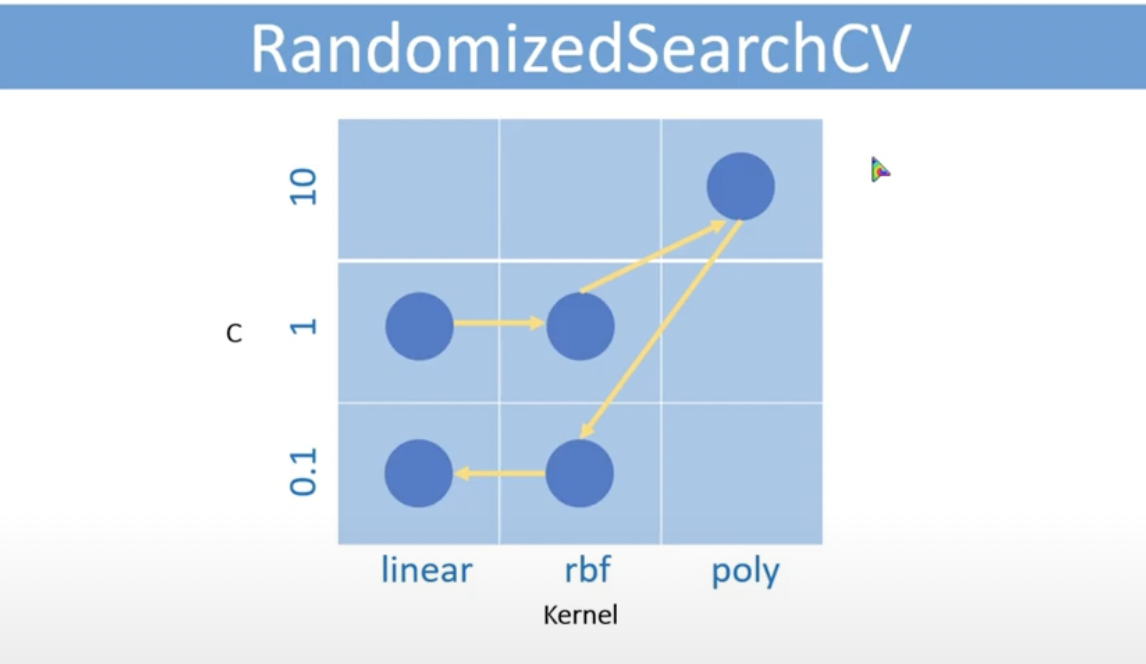

In [27]:
from sklearn.model_selection import RandomizedSearchCV

In [28]:
param_dist = {'C':[0.1,1,10],'kernel':['rbf','linear','poly']}

In [31]:
randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,n_iter=8)
randomized_search.fit(x_train, y_train)

RandomizedSearchCV(estimator=SVC(), n_iter=8,
                   param_distributions={'C': [0.1, 1, 10],
                                        'kernel': ['rbf', 'linear', 'poly']})

In [32]:
randomized_search.best_params_

{'kernel': 'linear', 'C': 10}

In [33]:
randomized_search.score(x_test, y_test)

0.9555555555555556